In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load dataset train
train = pd.read_csv('/content/drive/MyDrive/Projet_schoolofdata/train.csv')

In [ ]:
train.shape

(6036000, 8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [ ]:
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [ ]:
# definir X et y
X = train.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1)
y = train['pressure']

In [ ]:
# train test split sur train only
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4828800, 4), (1207200, 4), (4828800,), (1207200,))

In [ ]:
# rescaling rapide
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4828800, 4), (1207200, 4), (4828800,), (1207200,))

## preprocessing (padding)

In [ ]:
# max len
print(np.median([len(i) for i in X_train]))

4.0


In [ ]:
# Pad the sequences
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train,
                                 value=0,
                                 padding='post',
                                 maxlen=4)

X_test = sequence.pad_sequences(X_test,
                                value=0,
                                padding='post',
                                maxlen=4)

In [ ]:
X_train.shape, X_test.shape

((4828800, 4), (1207200, 4))

## LSTM (sans lookback)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# Define the model
def my_RNN():

    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=4, input_length=4))

    # We add two layers of LSTM 
    model.add(LSTM(units=24, return_sequences=True))
    model.add(LSTM(units=24, return_sequences=False))

    model.add(Dense(units=1, activation='sigmoid'))

    return model

In [ ]:
# Compile the model
model = my_RNN()

model.compile(optimizer='adam',
              loss='mse')

In [ ]:
# Train the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
37725/37725 [==============================] - 171s 5ms/step - loss: 170.2346 - val_loss: 170.1838
Epoch 2/10
37725/37725 [==============================] - 169s 4ms/step - loss: 170.2347 - val_loss: 170.1838
Epoch 3/10
37725/37725 [==============================] - 169s 4ms/step - loss: 170.2343 - val_loss: 170.1838
Epoch 4/10
37725/37725 [==============================] - 169s 4ms/step - loss: 170.2341 - val_loss: 170.1838
Epoch 5/10
37725/37725 [==============================] - 168s 4ms/step - loss: 170.2346 - val_loss: 170.1838
Epoch 6/10
37725/37725 [==============================] - 170s 4ms/step - loss: 170.2343 - val_loss: 170.1838
Epoch 7/10
37725/37725 [==============================] - 169s 4ms/step - loss: 170.2344 - val_loss: 170.1838
Epoch 8/10
37725/37725 [==============================] - 169s 4ms/step - loss: 170.2340 - val_loss: 170.1838
Epoch 9/10
37725/37725 [==============================] - 168s 4ms/step - loss: 170.2335 - val_loss: 170.1838
Epoch 10/1

In [ ]:
y_pred = model.predict(X_test)

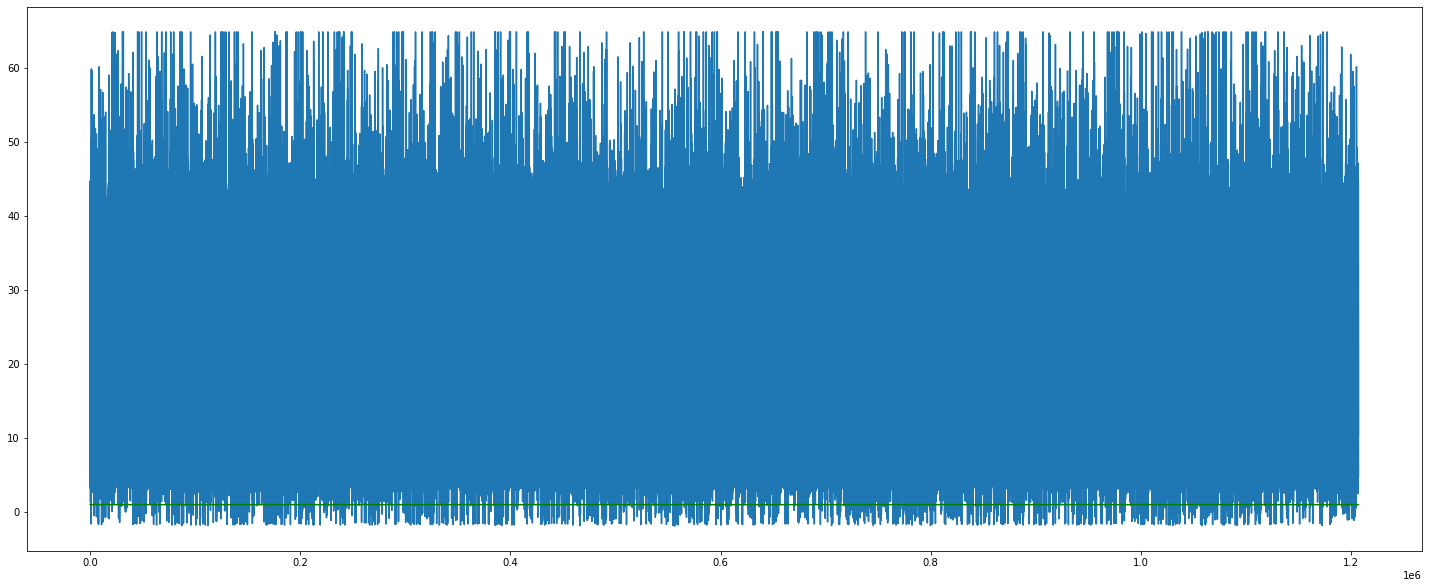

In [ ]:
# TODO: Plot the results
plt.figure(figsize=(25,10))
plt.plot(y_test.values) 
plt.plot(y_pred.flatten(), color='green')
plt.show()

## LSTM bidirectionnel

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding

# Building the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=4, input_length=4))
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5)))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
# Train the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
37725/37725 [==============================] - 335s 9ms/step - loss: 39.7224 - val_loss: 38.4269
Epoch 2/10
37725/37725 [==============================] - 337s 9ms/step - loss: 38.9029 - val_loss: 38.4180
Epoch 3/10
37725/37725 [==============================] - 319s 8ms/step - loss: 38.8132 - val_loss: 38.3698
Epoch 4/10
37725/37725 [==============================] - 300s 8ms/step - loss: 38.7920 - val_loss: 38.3624
Epoch 5/10
37725/37725 [==============================] - 300s 8ms/step - loss: 38.7736 - val_loss: 38.3758
Epoch 6/10
37725/37725 [==============================] - 294s 8ms/step - loss: 38.7698 - val_loss: 38.3869
Epoch 7/10
37725/37725 [==============================] - 292s 8ms/step - loss: 38.7642 - val_loss: 38.3588
Epoch 8/10
37725/37725 [==============================] - 287s 8ms/step - loss: 38.7539 - val_loss: 38.3629
Epoch 9/10
37725/37725 [==============================] - 296s 8ms/step - loss: 38.7437 - val_loss: 38.3743
Epoch 10/10
37725/37725 [===

In [ ]:
y_pred = model.predict(X_test)

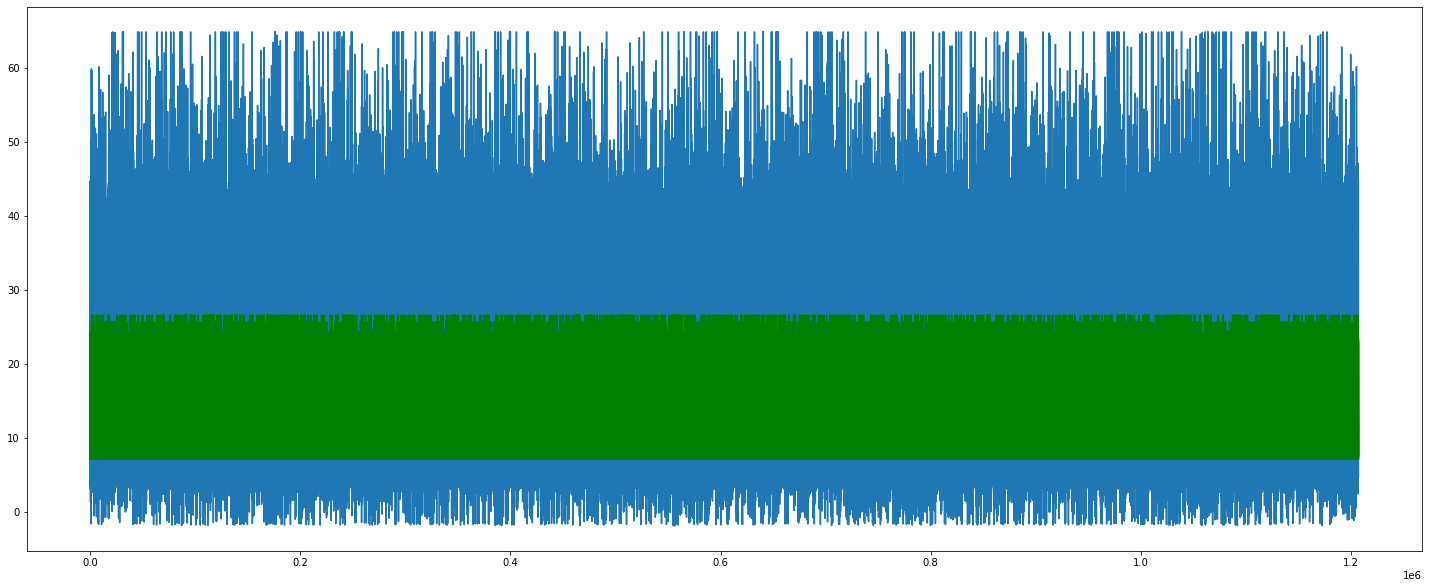

In [ ]:
# TODO: Plot the results
plt.figure(figsize=(25,10))
plt.plot(y_test.values) 
plt.plot(y_pred.flatten(), color='green')
plt.show()

## LSTM sans padding

In [ ]:
# definir X et y
X = train.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1)
y = train['pressure']

In [ ]:
# train test split sur train only
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4828800, 4), (1207200, 4), (4828800,), (1207200,))

In [ ]:
# rescaling rapide
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4828800, 4), (1207200, 4), (4828800,), (1207200,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding

# Building the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=4, input_length=4))
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5)))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
# Play an audio beep. Any audio URL will do.
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
output.eval_js('new Audio("/content/Pikachu.mp3").play()')

Epoch 1/10
37725/37725 [==============================] - 315s 8ms/step - loss: 40.4137 - val_loss: 38.4068
Epoch 2/10
37725/37725 [==============================] - 311s 8ms/step - loss: 38.7407 - val_loss: 38.3653
Epoch 3/10
37725/37725 [==============================] - 315s 8ms/step - loss: 38.6823 - val_loss: 38.3738
Epoch 4/10
37725/37725 [==============================] - 308s 8ms/step - loss: 38.6675 - val_loss: 38.3496
Epoch 5/10
37725/37725 [==============================] - 308s 8ms/step - loss: 38.6589 - val_loss: 38.3612
Epoch 6/10
37725/37725 [==============================] - 307s 8ms/step - loss: 38.6578 - val_loss: 38.3473
Epoch 7/10
37725/37725 [==============================] - 307s 8ms/step - loss: 38.6602 - val_loss: 38.3581
Epoch 8/10
37725/37725 [==============================] - 309s 8ms/step - loss: 38.6464 - val_loss: 38.3588
Epoch 9/10
37725/37725 [==============================] - 308s 8ms/step - loss: 38.6470 - val_loss: 38.3679
Epoch 10/10
37725/37725 [===

MessageError: ignored

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[0]

array([17.863443], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

38.32664662055003


In [ ]:
# racine carrée de la mse finale
np.sqrt(mse)

6.190851849345939

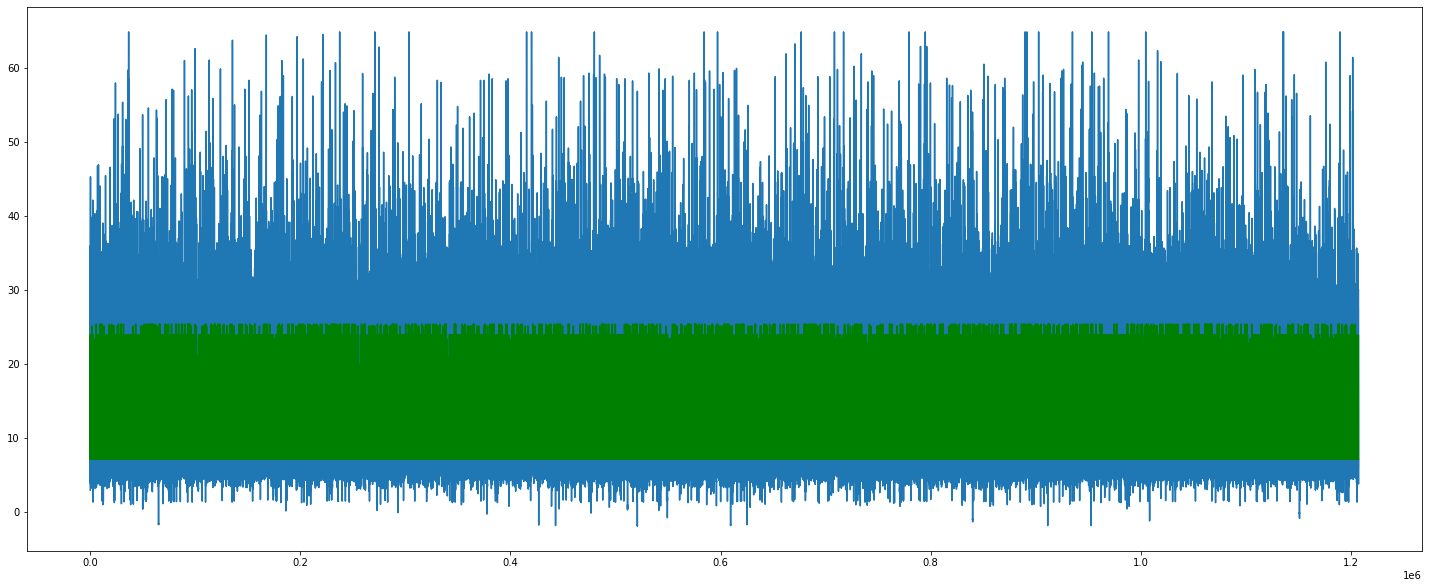

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(y_test.values) 
plt.plot(y_pred, color='green')
plt.show()

In [ ]:
import IPython
display(IPython.display.Audio('/content/Pikachu.mp3', autoplay=True))

## LSTM avec lookback (dataset part 3)

In [3]:
import IPython

In [4]:
# prendre dataset réduit
train1 = train[:3000000]
#train2 = train[2000000:4000000]
#train3 = train[4000000:]

In [5]:
# test en prenant RNN advanced et gestion time series avec lookback

# TODO: Compute X and y en prenant lookback
def processData(data, past):
    X = []                                   # on cree une matrice X
    for i in range(len(data)-past-1):             # on itere sur les dates 
        X.append(data.iloc[i:i+past].values)           # pas besoin de mettre l'indice des colonnes, on prend tout
    return np.array(X)

lookback = 80                                     # pour regarder past respiration - 1 respi = 80 données

y = train1['pressure'][lookback+1:]
X = processData(train1.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1), lookback)
X.shape, y.shape

((2999919, 80, 4), (2999919,))

In [6]:
# TODO: split (on shuffle pas pour garder information temporelle)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2399935, 80, 4), (599984, 80, 4), (2399935,), (599984,))

In [ ]:
# scale data
# impossible d'utiliser standardscaler ici car 3 dim
X_train = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

In [9]:
X_test = (X_test - np.mean(X_test, axis=0))/np.std(X_test, axis=0)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [ ]:


# Define the model

def my_RNN():

    model = Sequential()

    # We add two layers of RNN 
    model.add(LSTM(units=32, return_sequences=True, input_shape=(lookback, 4), activation='sigmoid'))
    model.add(LSTM(units=32, return_sequences=False, activation='sigmoid'))
    
    # Finally we add a sigmoid
    model.add(Dense(units=1, activation='linear'))

    return model

In [ ]:
model = my_RNN()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 80, 32)            4736      
                                                                 
 lstm_14 (LSTM)              (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='mse')

In [ ]:
# Train the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)
display(IPython.display.Audio('/content/Pikachu.mp3', autoplay=True))

Epoch 1/5
12725/12725 [==============================] - 2733s 215ms/step - loss: 11.8069 - val_loss: 3.1332
Epoch 2/5
 4388/12725 [=========>....................] - ETA: 29:12 - loss: 2.5659

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# TODO: Plot the results
plt.figure(figsize=(25,10))
plt.plot(y_test.values) 
plt.plot(y_pred.flatten(), color='green')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)